<a href="https://colab.research.google.com/github/seodalzzz/ESAA/blob/Exercises/EVALUATION_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 모듈 및 데이터 로드 
from sklearn.datasets import load_breast_cancer 
from sklearn.linear_model import LogisticRegression 

data = load_breast_cancer() 

# x, y 데이터 생성 
X = data.data 

# 악성을 1, 양성을 0으로 
y = 1 - data.target 

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10] 

# 로지스틱 회귀 모델 생성 
model_lor = LogisticRegression(solver = 'lbfgs') 
model_lor.fit(X,y) 
y_pred = model_lor.predict(X)

* 오차 행렬(혼동 행렬) 생성

In [ ]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix

confusion_matrix(y,y_pred)

array([[337,  20],
       [ 30, 182]])

* 정확도

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y,y_pred)

0.9121265377855887

* 정밀도

In [ ]:
from sklearn.metrics import precision_score
precision_score(y,y_pred)

0.900990099009901

* 재현율

In [ ]:
from sklearn.metrics import recall_score
recall_score(y,y_pred)

0.8584905660377359

* F1 score

In [ ]:
from sklearn.metrics import f1_score

f1_score(y,y_pred)

0.8792270531400966

* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [ ]:
from sklearn.preprocessing import Binarizer

pred_proba=model_lor.predict_proba(X)

custom_threshold=0.9
pred_proba_1=pred_proba[:,1].reshape(-1,1)

binarizer=Binarizer(threshold=custom_threshold)
y_pred2=binarizer.fit_transform(pred_proba_1)

In [ ]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기

def get_clf_eval(y_test,pred):
  confusion=confusion_matrix(y_test,pred)
  accuracy=accuracy_score(y_test,pred)
  precision=precision_score(y_test,pred)
  recall=recall_score(y_test,pred)
  f1=f1_score(y_test,pred)
  print('오차 행렬')
  print(confusion)
  print('정확도:{0:.4f},정밀도:{1:.4f},재현율:{2:.4f},f1:{3:.4f}'.format(accuracy,precision,recall,f1))

print('\ny_pred2\n')
get_clf_eval(y,y_pred2)


y_pred2

오차 행렬
[[356   1]
 [ 73 139]]
정확도:0.8699,정밀도:0.9929,재현율:0.6557,f1:0.7898


* ROC 곡선 시각화

In [ ]:
from sklearn.metrics import roc_curve 
predict_proba_class1=model_lor.predict_proba(X)[:,1]

fprs,tprs,thresholds=roc_curve(y,predict_proba_class1)

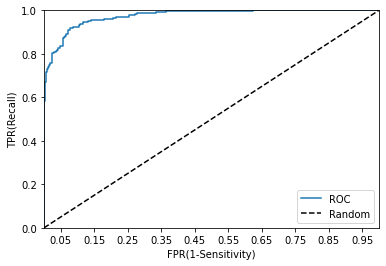

In [91]:
import matplotlib.pyplot as plt 
import numpy as np

def roc_curve_plot(y_test,pred_proba_c1):
  #임곗값에 따른 FPR, TPR 값을 반환받음
  fprs, tprs, thresholds =roc_curve(y_test, pred_proba_c1)
  #ROC 곡선을 그래프 곡선으로 그림
  plt.plot(fprs, tprs, label='ROC')
  #가운데 대각선 직선을 그림
  plt.plot([0,1],[0,1],'k--',label='Random')

  #FPR X축의 Scale을 0.1 단위로 변경, X,Y축 명 설정 등
  start,end=plt.xlim()
  plt.xticks(np.round(np.arange(start,end,0.1),2))
  plt.xlim(0,1)
  plt.ylim(0,1)
  plt.xlabel('FPR(1-Sensitivity)')
  plt.ylabel('TPR(Recall)')
  plt.legend()

roc_curve_plot(y,predict_proba_class1)

* ROC AUC 값

In [90]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y,y_pred)

0.9012340785370753